In [21]:
import numpy as np
import keras as k
import tensorflow as tf

In [22]:
max_words = 20000
(train_x, train_y), (test_x, test_y) = k.datasets.imdb.load_data(num_words=max_words)

In [23]:
print(train_x[0:2])
print(train_y[0:2])
# length of the max review
print(len(train_y))

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 

In [8]:
max_review_length = 80
train_x = k.preprocessing.sequence.pad_sequences(train_x, truncating='pre', padding='pre', maxlen=max_review_length)
test_x = k.preprocessing.sequence.pad_sequences(train_x, truncating='pre', padding='pre', maxlen=max_review_length)

In [17]:
print(train_x[0:2])


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 2071   56   26  141    6  194 7486   18    4  226   22   21
   134  476   26  480    5  144   30 5535   18   51   36   28  224   92
    25  104    4  226   65   16   38 1334   88   12   16  283    5   16
  4472  113  103   32   15   16 5345   19  178   32]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 8255    5    2  656  245 2350    5    4 9837  131  152  491
    18    2   32 7464 1212   14    9    6  371   78   22  625   64 1382
     9    8  168  145   23    4 1690   15   16    4 1355    5   28    6
    52  154  462   33   89   78  285   16  145   95]]


In [19]:
# decode the reviews
word_index = k.datasets.imdb.get_word_index()
index_word = dict([(v,k) for (k,v) in word_index.items()])
review = [index_word.get(idx-3) for idx in train_x[3]]
print(review)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'man', 'to', 'see', 'a', 'film', 'that', 'is', 'true', 'to', 'scotland', 'this', 'one', 'is', 'probably', 'unique', 'if', 'you', 'maybe', None, 'on', 'it', 'deeply', 'enough', 'you', 'might', 'even', 're', 'evaluate', 'the', 'power', 'of', 'storytelling', 'and', 'the', 'age', 'old', 'question', 'of', 'whether', 'there', 'are', 'some', 'truths', 'that', 'cannot', 'be', 'told', 'but', 'only', 'experienced']


In [26]:
from keras.layers import LSTM, Dense
from keras.layers.embeddings import Embedding
from keras.models import Sequential

emb_vec_len = 100
model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = emb_vec_len, mask_zero = True, name = 'sentiment_Emb'))
model.add(LSTM(units = 50, name = 'sentiment_LSTM'))
model.add(Dense(units=1, activation = 'sigmoid', name = 'sentiment_dense_sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sentiment_Emb (Embedding)    (None, None, 100)         2000000   
_________________________________________________________________
sentiment_LSTM (LSTM)        (None, 50)                30200     
_________________________________________________________________
sentiment_dense_sigmoid (Den (None, 1)                 51        
Total params: 2,030,251
Trainable params: 2,030,251
Non-trainable params: 0
_________________________________________________________________


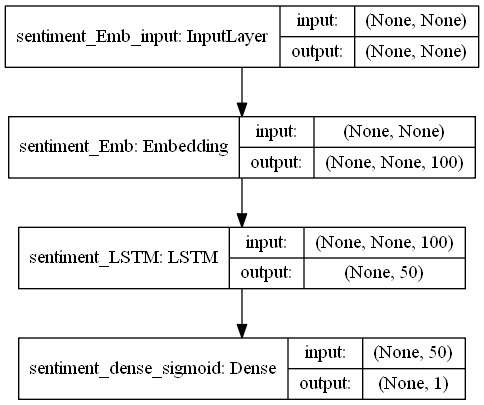

In [28]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sentiment_keras_lstm.png')

In [17]:
# one hot presentations
from keras.preprocessing.text import one_hot

# define documents
docs = ['My name is Sandipan',
       'Sandipan has a dog',
       'Eat some food',
       'This is bad']
vocab_size = 10000

encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[2037, 5250, 6294, 2167], [2167, 4547, 3025, 30], [9367, 8361, 3794], [6785, 6294, 4175]]


In [18]:
# word embadding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

embedding_len = 5
max_doc_len = 10

encoded_docs = pad_sequences(encoded_docs, truncating='post', padding='post', maxlen=max_doc_len)

print(encoded_docs)


[[2037 5250 6294 2167    0    0    0    0    0    0]
 [2167 4547 3025   30    0    0    0    0    0    0]
 [9367 8361 3794    0    0    0    0    0    0    0]
 [6785 6294 4175    0    0    0    0    0    0    0]]


In [19]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_len, input_length=max_doc_len))
model.add(LSTM(units=64))
model.add(Dense(1, activation='sigmoid'))
model.compile('rmsprop', 'mse')
model.summary()

output = model.predict(encoded_docs)
print(output.shape)
print(output)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 10, 5)             50000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 67,985
Trainable params: 67,985
Non-trainable params: 0
_________________________________________________________________
(4, 1)
[[0.50229675]
 [0.50242704]
 [0.5026755 ]
 [0.5025744 ]]
